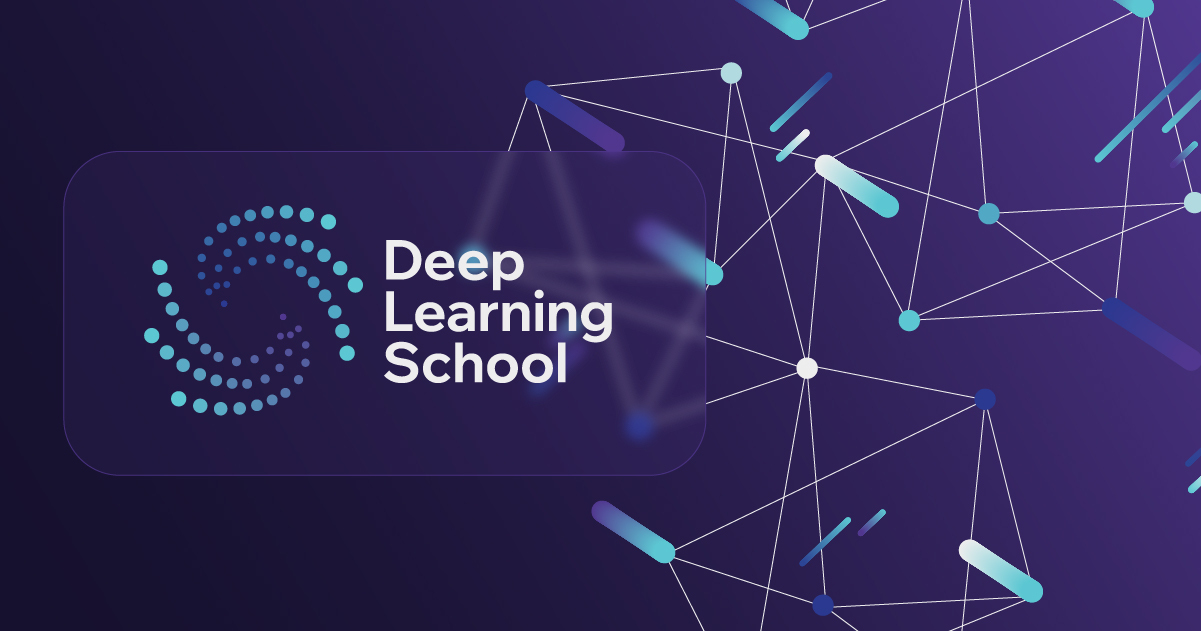

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

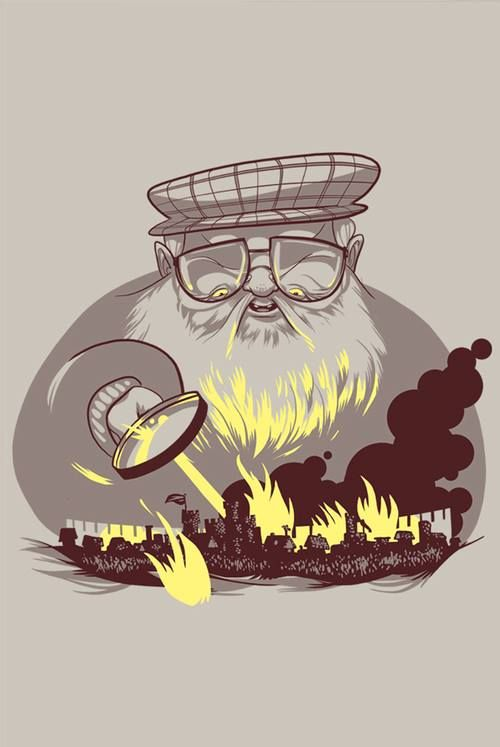

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 54.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 77.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [2]:
data = pd.read_csv("game_of_thrones_train.csv", index_col='S.No')

In [3]:
data.sample(10)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1267,Ondrew Locke,Lord of Oldcastle,1,Northmen,NaN,NaN,NaN,NaN,House Locke,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.036789,1
211,Tristan Ryger,NaN,0,NaN,NaN,NaN,NaN,NaN,House Ryger,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.006689,1
1026,Endrew Tarth,Ser,1,NaN,NaN,NaN,NaN,NaN,House Tarth,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.066890,0
1074,Gunthor Hightower,Ser,0,NaN,NaN,NaN,NaN,NaN,House Hightower,Jeyne Fossoway,...,NaN,NaN,NaN,1.0,1,1,NaN,0,0.053512,1
475,Dyah,NaN,0,Free Folk,NaN,NaN,NaN,NaN,NaN,Craster,...,NaN,NaN,NaN,0.0,1,0,NaN,0,0.016722,1
687,Lanna (Happy Port),NaN,0,Braavosi,286.0,NaN,NaN,NaN,Happy Port,NaN,...,NaN,NaN,NaN,NaN,0,0,19.0,0,0.026756,1
1195,Edric Storm,NaN,1,NaN,287.0,NaN,NaN,NaN,House Baratheon,NaN,...,NaN,NaN,NaN,NaN,0,0,18.0,0,0.284281,1
230,Urrathon,NaN,0,Qartheen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.013378,1
1224,Megga Tyrell,NaN,0,NaN,286.0,NaN,NaN,NaN,House Tyrell,NaN,...,NaN,NaN,NaN,NaN,0,0,19.0,0,0.153846,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
# Посмотрим сколько пропущенных значений в каждом отдельном стоблце
# При том условии, что предоставлена информация о 1557 персонаже
data.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

Можно заметить, что в половине стоблцов пропуски занимают 70%+ информации. Поэтому упростим данные признаки, сделав их бинарными. Теперь мы будем знать известен ли признак X для конкретного персонажа


In [5]:
most_na = [
    'title', 'culture', 'dateOfBirth', 'mother', 'father',
    'heir', 'house', 'spouse', 'isAliveMother', 'isAliveFather',
    'isAliveHeir', 'isAliveSpouse', 'age'
]

In [6]:
for tag in most_na:
    data[tag] = (data[tag].replace(np.nan, 'No') != 'No').astype(int)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.


In [7]:
data['isPopular'] = (data.popularity > 0.4).astype(int)

In [8]:
# Создадим признак boolDeadRelations и удалим numDeadRelations
data['boolDeadRelations'] = (data.numDeadRelations > 0)
data.drop('numDeadRelations', axis=1, inplace=True)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
# Удалим столбец имён, так как он точно не влияет на целевую переменную
data.drop(columns=['name'], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

([<matplotlib.patches.Wedge at 0x1532b6990>,
 [Text(-0.84407383662417, 0.7053646988094556, ''),
  Text(0.8440738982891097, -0.7053646250181715, '')],
 [Text(-0.46040391088591087, 0.38474438116879395, '77.8%'),
  Text(0.46040394452133254, -0.3847443409190026, '22.2%')])

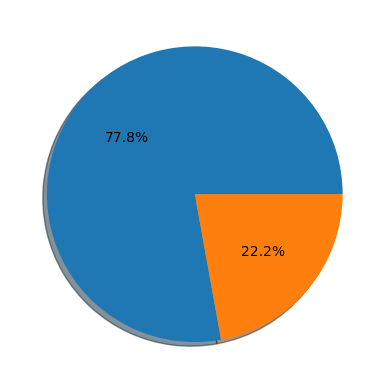

In [10]:
plt.pie(
    data['isAlive'].value_counts(),
    autopct='%1.1f%%',
    shadow=True
)

### Классы распределены в соотношении 3:1, поэтому считать датасет сбалансированным нельзя

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

<Axes: >

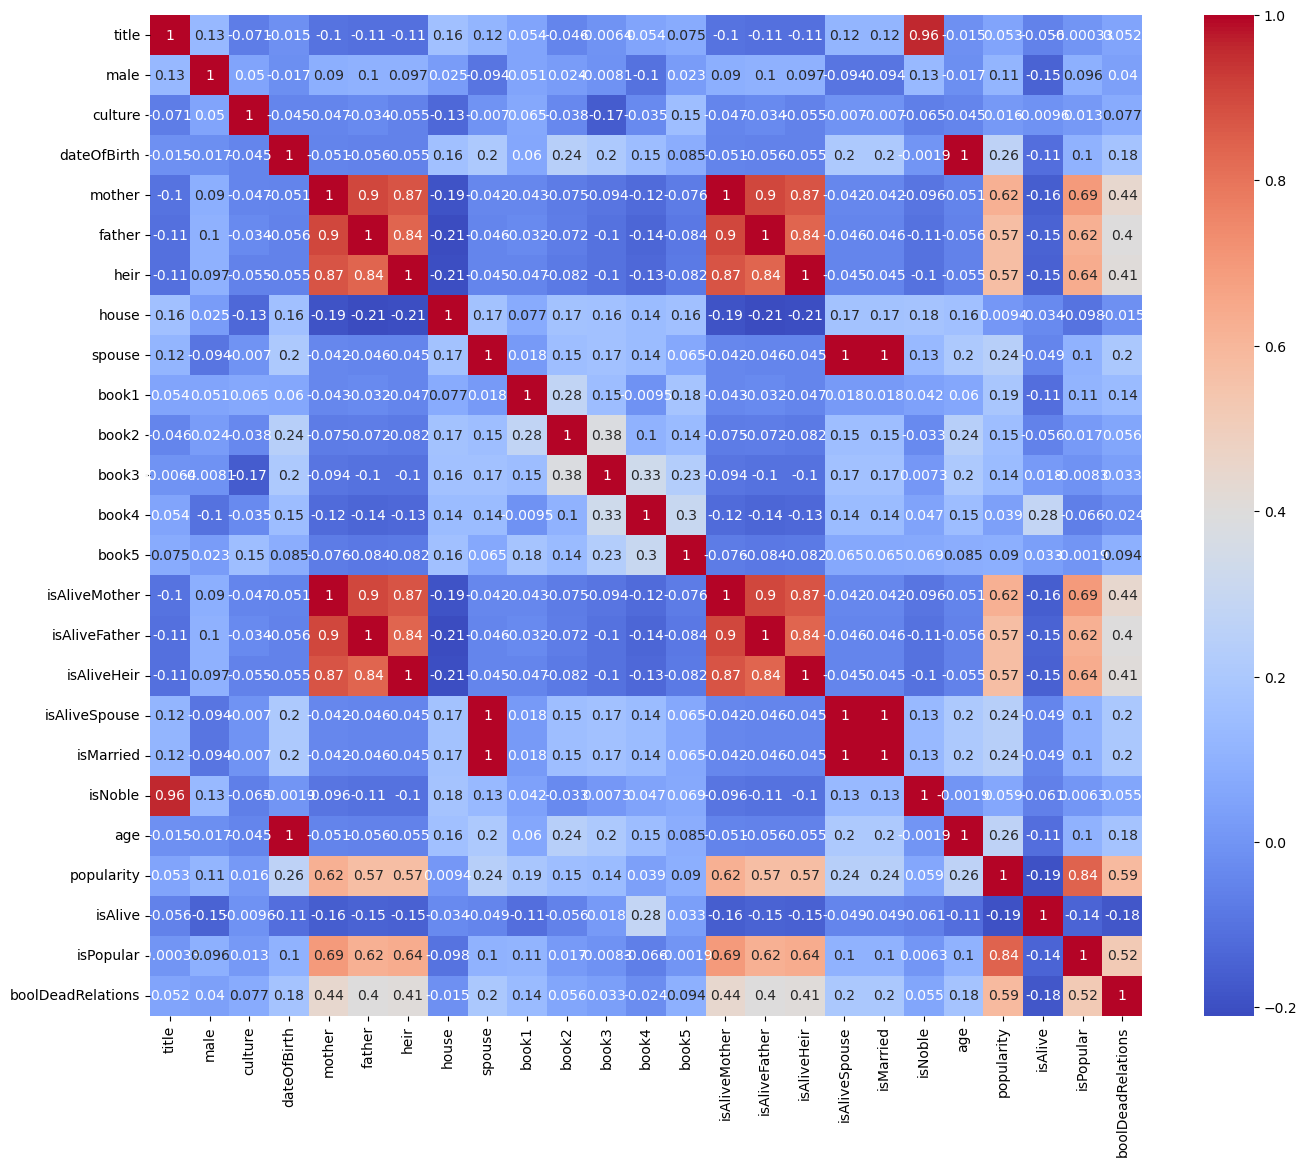

In [11]:
# Составим корреляционную таблицу
plt.figure(figsize=(16, 13))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Проанализировав таблицу, можно заметить, что какой-то конкретный признак мало влияет на целевую переменную



**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [12]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

#### Подготовим датасет к обучению модели

In [15]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

In [16]:
# Определим веса классов
class_weights = dict(enumerate(compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)))

In [17]:
# Стандартизируем признаки
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Фунекция, в которой будет происходить обучения модели

In [18]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV


def run_classifier(clf, param_grid):
    # Делим датасет на части для кросс-валидации
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Randomized grid search
    num_iter_search = 10
    gs = RandomizedSearchCV(
        clf,
        param_distributions=param_grid,
        n_iter=num_iter_search,
        cv=cv,
        scoring='accuracy'
    )

    gs.fit(X_train, y_train)
    print(f"Лучшие параметры: {gs.best_params_}")
    y_pred = gs.best_estimator_.predict(X_test)

    return y_pred

### Логистическая регрессия

In [28]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression(class_weight=class_weights)
param_grid = {
    'C': [10, 1, 0.1, 0.01],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

lr_pred = run_classifier(logistic_regression, param_grid)

/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: Conver

Лучшие параметры: {'solver': 'sag', 'penalty': 'l2', 'C': 0.01}


### Алгоритм ближайших соседей

In [29]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1, 30, 2),
    'weights': ['uniform', 'distance'],
    'leaf_size': np.arange(1, 30, 2),
    'algorithm': ['auto', 'kd_tree']
}

knn_pred = run_classifier(knn, param_grid)

Лучшие параметры: {'weights': 'uniform', 'n_neighbors': np.int64(21), 'leaf_size': np.int64(9), 'algorithm': 'kd_tree'}


### Дерево решений

In [30]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(class_weight=class_weights)
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(1, 20, 2),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'max_features': ['auto', 'sqrt', 'log2']}

dtree_pred = run_classifier(dtree, param_grid)

Лучшие параметры: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': np.int64(7), 'criterion': 'gini'}


/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/aleksandr/miniconda3/envs/deep-machine-learning/

### Случайный лес

In [31]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(class_weight=class_weights)
param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

rf_pred = run_classifier(rf, param_grid)

Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aleksandr/miniconda3/envs/deep-machine-learning/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/aleksandr/miniconda3/envs/deep-machine-learning/

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, dtree_pred)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6538
Accuracy : 0.8045
Accuracy : 0.6763
Accuracy : 0.7788


Выберите лучшую модель.

### На основе тестирования моделей, лучшим показал себя алгоритм k ближайших соседей. Проверим результаты, загрузив их в тестирующую систему

# Загрузим тестовый датасет

In [19]:
test_data = pd.read_csv("game_of_thrones_test.csv", index_col='S.No')

In [20]:
test_data.sample(10)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1797,Rakharo,Bloodrider,1,Dothraki,NaN,NaN,NaN,NaN,House Targaryen,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.183946
1742,Jaime Lannister,Ser,1,Westerlands,266.0,NaN,NaN,NaN,House Lannister,NaN,...,1,NaN,NaN,NaN,NaN,0,1,39.0,7,1.000000
1716,Gregor Clegane,Ser,1,NaN,265.0,NaN,NaN,NaN,House Clegane,NaN,...,1,NaN,NaN,NaN,NaN,0,1,35.0,1,0.836120
1823,Steely Pate,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.013378
1791,Robin Potter,Ser,1,NaN,NaN,NaN,NaN,NaN,House Potter,NaN,...,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067
1635,Archibald Yronwood,Ser,1,NaN,NaN,NaN,NaN,NaN,House Yronwood,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.140468
1601,Pylos,Maester,1,NaN,273.0,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,1,32.0,0,0.056856
1629,Alester Florent,Brightwater,1,NaN,NaN,NaN,NaN,NaN,House Florent,Melara Crane,...,1,NaN,NaN,NaN,1.0,1,1,NaN,0,0.327759
1687,Dywen,NaN,1,NaN,NaN,NaN,NaN,NaN,Night's Watch,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.093645


### Выполним те же преобразования с test_data

In [21]:
for tag in most_na:
    test_data[tag] = (test_data[tag].replace(np.nan, 'No') != 'No').astype(int)

In [22]:
test_data['isPopular'] = (test_data.popularity > 0.4).astype(int)

In [23]:
test_data['boolDeadRelations'] = (test_data.numDeadRelations > 0)
test_data.drop('numDeadRelations', axis=1, inplace=True)

In [25]:
test_data.drop(columns=['name'], inplace=True)

### Нормализуем выборку

In [26]:
# Стандартизируем признаки
test_sc = StandardScaler()
test_data = test_sc.fit_transform(test_data)

### Обучим лучшие модели

In [32]:
best_lr_model = LogisticRegression(
    solver='sag',
    penalty='l2',
    C=0.01,
    class_weight=class_weights
)

best_lr_model.fit(X_train, y_train)
lr_pred = best_lr_model.predict(test_data)

In [33]:
best_knn_model = KNeighborsClassifier(
    weights='uniform',
    n_neighbors=17,
    leaf_size=7,
    algorithm='kd_tree'
)

best_knn_model.fit(X_train, y_train)
knn_pred = best_knn_model.predict(test_data)

In [34]:
best_dtree_model = DecisionTreeClassifier(
    splitter='best',
    min_samples_split=5,
    min_samples_leaf=10,
    max_features='sqrt',
    max_depth=19,
    criterion='entropy',
    class_weight=class_weights
)

best_dtree_model.fit(X_train, y_train)
dtree_pred = best_dtree_model.predict(test_data)

In [35]:
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=20,
    criterion='gini',
    bootstrap=True,
    class_weight=class_weights
)

best_rf_model.fit(X_train, y_train)
rf_pred = best_rf_model.predict(test_data)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [37]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.8MB/s]


In [37]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [42]:
cnt = 1
for cur_pred in [lr_pred, knn_pred, dtree_pred, rf_pred]:
    submission['isAlive'] = cur_pred
    submission.to_csv(f"{cnt}_submission.csv", index=False)
    cnt += 1

### На тестовой выборке лучшие результаты показала модель Random Forest с результатами accuracy — 0.7. Можно сделать вывод, что все модели оказались перетренированными